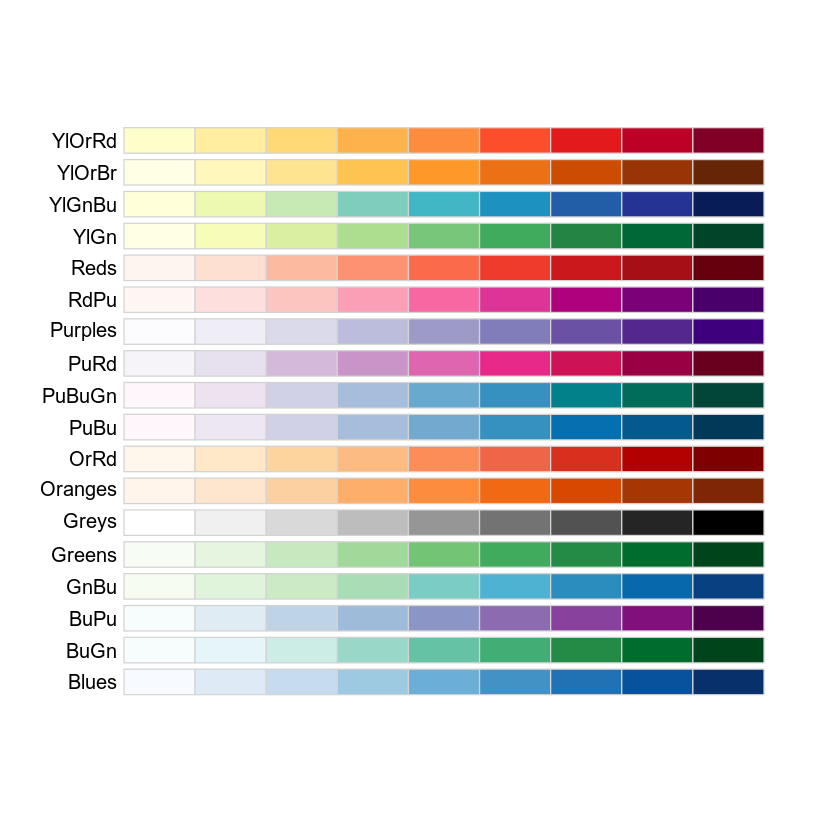

In [27]:
library(tidyverse)
library(dslabs)

library(RColorBrewer)
display.brewer.all(type = 'seq')

##### Significant digits
 Use relevant amount of significant digits. See `signif` and `round`. To globally set the significant digits with the option `options(digits = n)`

##### Reorder the data
`reorder(dataset, colName, levelNames`

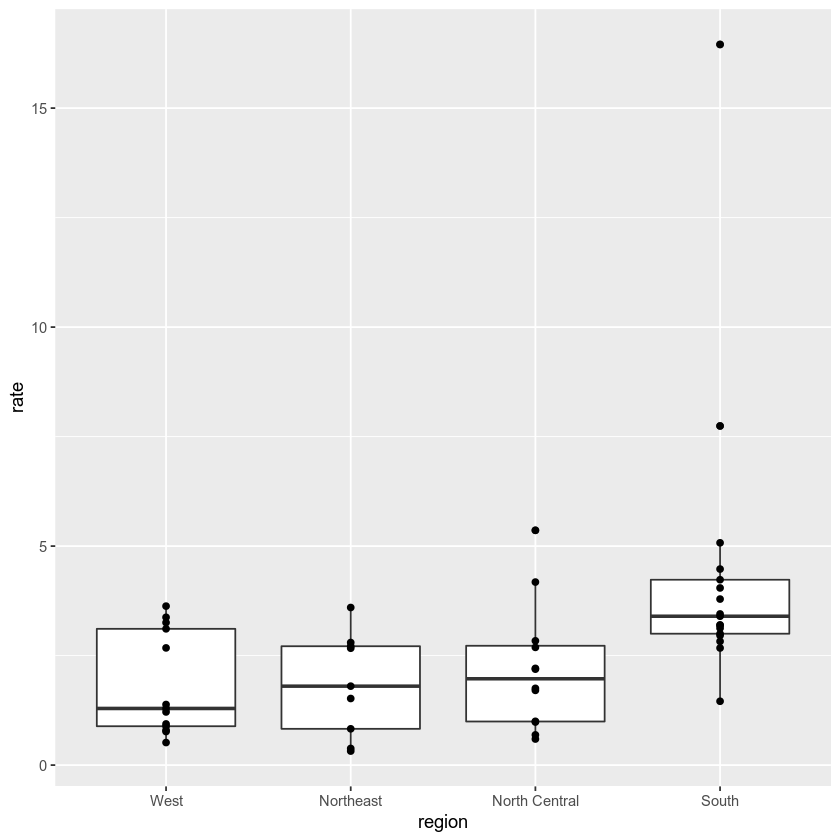

In [16]:
data(murders)

murders %>%
    mutate(rate = total / population * 10^5) %>%
    mutate(region = reorder(region, rate, FUN = median)) %>%
    ggplot(aes(x = region, y = rate)) +
        geom_boxplot() +
        geom_point()

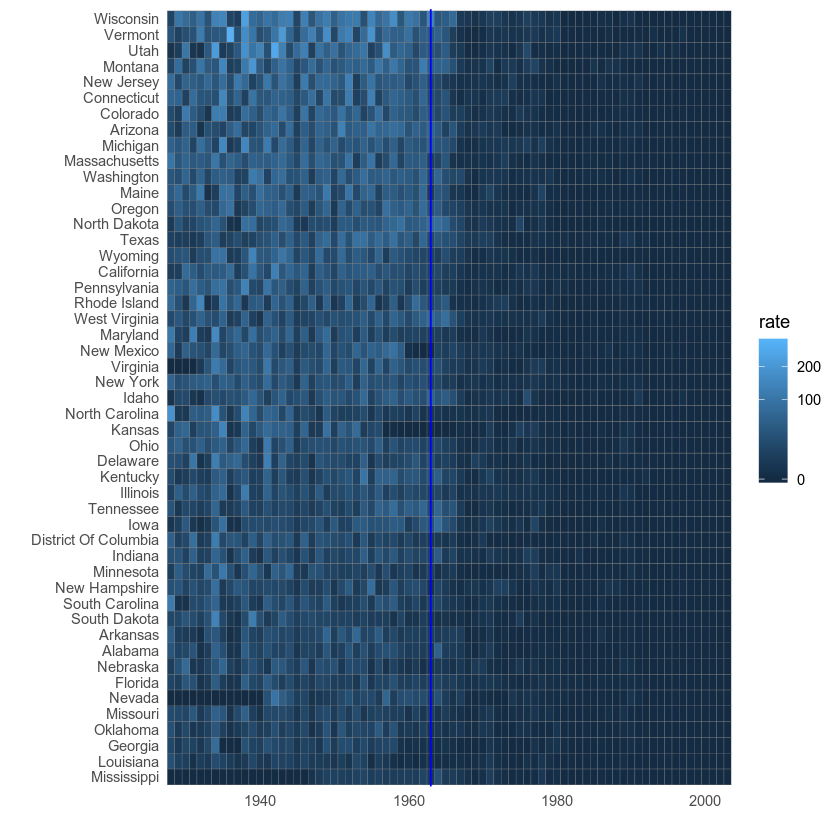

In [48]:
# US vaccinations
data(us_contagious_diseases)

# We use only measles
dat <- us_contagious_diseases %>%
    filter( disease %in% c('Measles') &
            !state %in% c('Hawaii', 'Alaska')) %>%
    mutate(rate = count / population * 10^4) %>%
    mutate(state = reorder(state, rate))

dat %>%
    ggplot(aes(x = year, y = state, fill = rate)) +
        geom_tile(color = 'gray50') +
        scale_x_continuous(expand = c(0, 0)) +
        #scale_fill_gradient(colors = brewer.pal(9, 'Reds'), trans = 'sqrt') +
        scale_fill_gradient(trans = 'sqrt') +
        geom_vline(xintercept = 1963, col = 'blue') +
        theme_minimal() +
        theme(panel.grid = element_blank()) +
        ylab('') +
        xlab('')

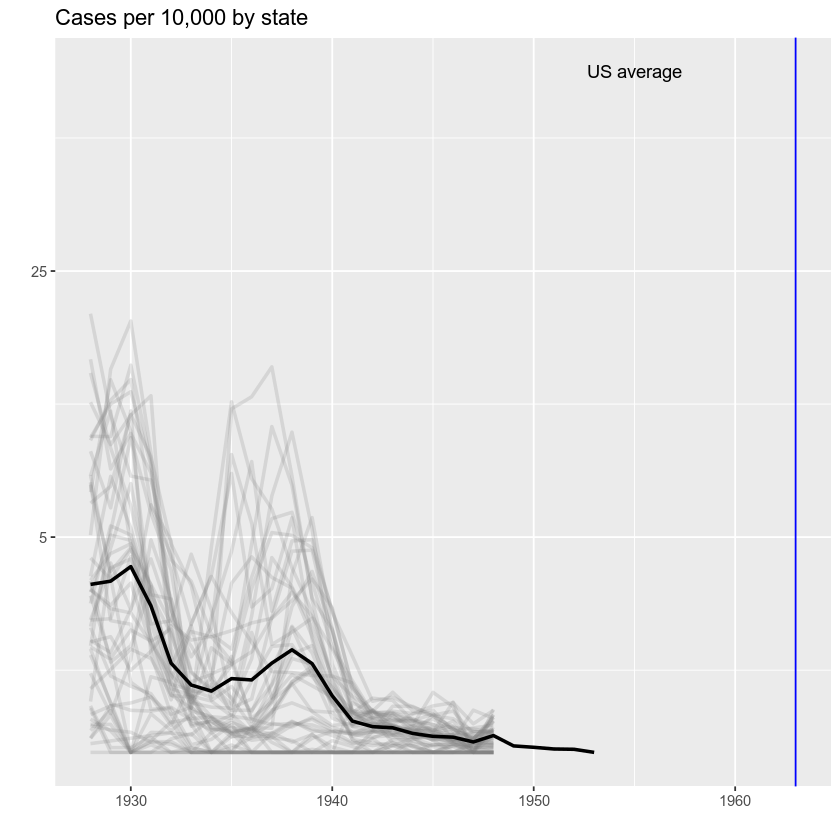

In [53]:
the_disease = "Smallpox"
dat <- us_contagious_diseases %>%
   filter(!state%in%c("Hawaii","Alaska") & disease == the_disease & weeks_reporting >= 10) %>%
   mutate(rate = count / population * 10000) %>%
   mutate(state = reorder(state, rate))

avg <- us_contagious_diseases %>%
  filter(disease==the_disease) %>% group_by(year) %>%
  summarize(us_rate = sum(count, na.rm=TRUE)/sum(population, na.rm=TRUE)*10000)

dat %>% ggplot() +
  geom_line(aes(year, rate, group = state),  color = "grey50", 
            show.legend = FALSE, alpha = 0.2, size = 1) +
  geom_line(mapping = aes(year, us_rate),  data = avg, size = 1, color = "black") +
  scale_y_continuous(trans = "sqrt", breaks = c(5,25,125,300)) + 
  ggtitle("Cases per 10,000 by state") + 
  xlab("") + 
  ylab("") +
  geom_text(data = data.frame(x=1955, y=50), mapping = aes(x, y, label="US average"), color="black") + 
  geom_vline(xintercept=1963, col = "blue")

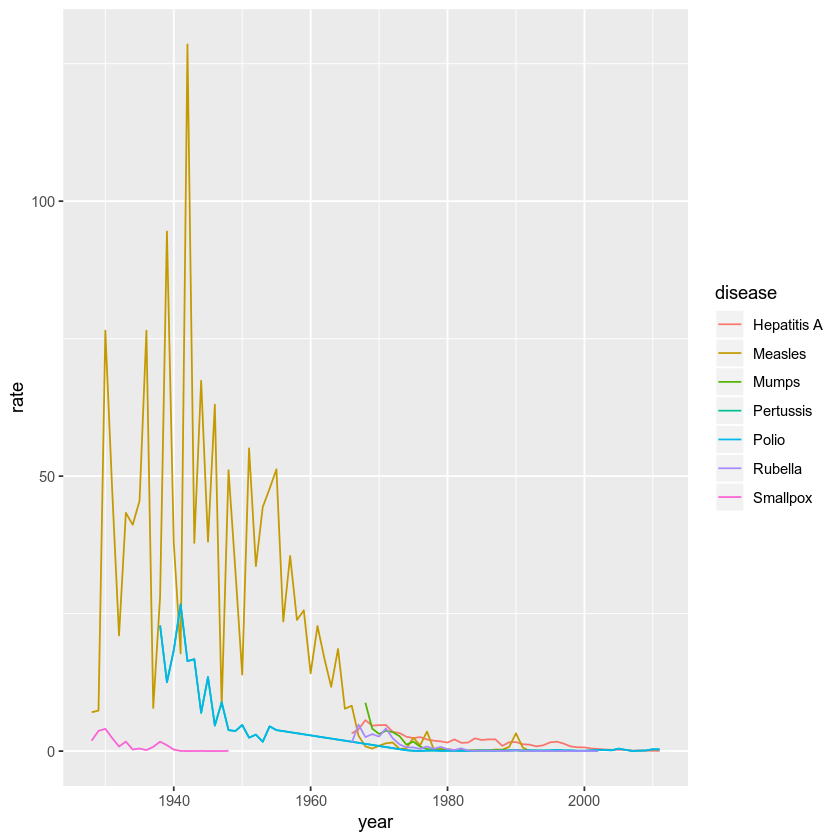

In [60]:
cali <- us_contagious_diseases %>%
    filter(state=="California" & weeks_reporting >= 10)

cali <- cali %>%
  group_by(year, disease)

cali <- cali %>%
  summarize(rate = sum(count)/sum(population)*10000)

cali %>%
  ggplot(aes(year, rate, color = disease)) + 
  geom_line()